<a href="https://colab.research.google.com/github/naminda/capstone/blob/main/CAR_CAPSTONE_30th_july_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Machine Learning - Classification
 

To learn more about Python, refeer to the following websites

* Python : www.python.org
* W3Schools : www.w3schools.com/python

To learn more about the Python packages we explore in this notebook, refeer to the following websites

* NumPy : www.numpy.org
* Matplotlib : www.matplotlib.org
* Pandas : https://pandas.pydata.org
* Scikit-Learn : https://scikit-learn.org/
* Seaborn: https://seaborn.pydata.org/
* StatsModel : https://www.statsmodels.org

In [1]:
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
from matplotlib import cm # Colomaps
import seaborn as sns
from sklearn import tree

# Classifier algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#train test split
from sklearn.model_selection import train_test_split

# Model evaluation
from sklearn import metrics

## Load Data

In [2]:
# From URL (GitHub raw file link)
file_path_url= 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'


# Load CSV File
car_data = pd.read_csv(file_path_url)
car_data.head(5)


,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


Rename column names

In [3]:
car_data.columns

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

In [4]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


no - null values

In [5]:
car_data.columns =['price','maint','doors','persons','boot_size','safety','likelyhood']
car_data.describe(include='all').transpose()

,count,unique,top,freq
price,1727,4,high,432
maint,1727,4,high,432
doors,1727,4,3,432
persons,1727,3,4,576
boot_size,1727,3,med,576
safety,1727,3,med,576
likelyhood,1727,4,unacc,1209


In [6]:
car_data.sample(5)

,price,maint,doors,persons,boot_size,safety,likelyhood
915,med,vhigh,3,more,big,med,acc
725,high,med,4,more,big,low,unacc
1599,low,med,5more,2,big,med,unacc
216,vhigh,med,2,2,small,med,unacc
710,high,med,4,4,small,low,unacc


In [7]:
car_data['maint'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
1722    False
1723    False
1724    False
1725    False
1726    False
Name: maint, Length: 1727, dtype: bool

In [8]:
car_data['maint'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [9]:
car_data['persons'].value_counts

<bound method IndexOpsMixin.value_counts of 0          2
1          2
2          2
3          2
4          2
        ... 
1722    more
1723    more
1724    more
1725    more
1726    more
Name: persons, Length: 1727, dtype: object>

In [10]:
car_data.head()

,price,maint,doors,persons,boot_size,safety,likelyhood
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


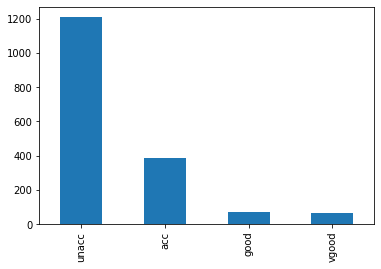

In [11]:
car_data['likelyhood'].value_counts().plot(kind='bar')

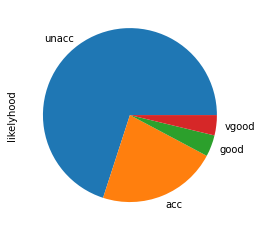

In [12]:
car_data['likelyhood'].value_counts().plot(kind='pie')

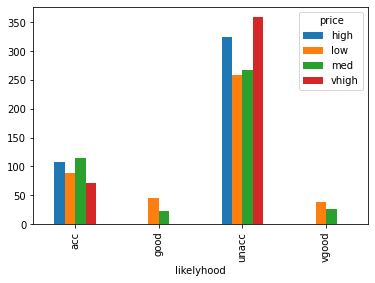

In [13]:
car_data.groupby(['likelyhood','price']).size().unstack().plot.bar()

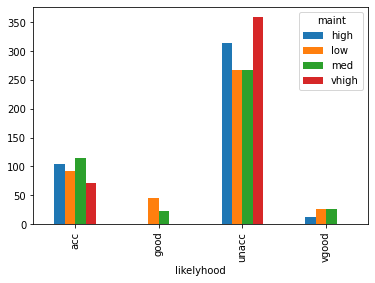

In [14]:
car_data.groupby(['likelyhood','maint']).size().unstack().plot.bar()

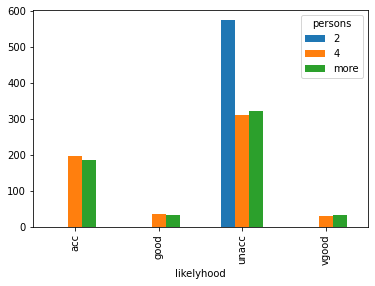

In [15]:
car_data.groupby(['likelyhood','persons']).size().unstack().plot.bar()

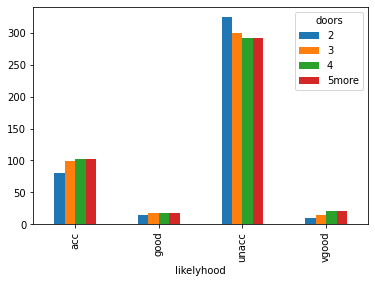

In [16]:
car_data.groupby(['likelyhood','doors']).size().unstack().plot.bar()

## Pre-processing Data

check duplicates

In [17]:
duplicates = car_data[car_data.duplicated()]
duplicates

,price,maint,doors,persons,boot_size,safety,likelyhood


One-hot enconding the data

In [18]:
temp_data=car_data.drop(['price','maint','doors','persons','boot_size','safety'],axis=1)

In [19]:
price = pd.get_dummies(car_data.price)
maint = pd.get_dummies(car_data.maint)
doors = pd.get_dummies(car_data.doors)
persons=pd.get_dummies(car_data.persons)
boot_size = pd.get_dummies(car_data.boot_size)
safety = pd.get_dummies(car_data.safety)

doors.sample(5)

,2,3,4,5more
1159,0,0,1,0
969,0,0,0,1
795,0,1,0,0
477,0,1,0,0
87,0,0,0,1


concatnatig of onehot encoded colmns

In [20]:
car_data = pd.concat([price,maint,doors,persons,boot_size,safety,temp_data], join='outer', axis=1)

In [21]:
price.head()

,high,low,med,vhigh
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


vizualise one hot encoded columns

In [22]:

car_data.sample(5)

,high,low,med,vhigh,high,low,med,vhigh,2,3,...,2,4,more,big,med,small,high,low,med,likelyhood
1705,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,1,0,0,unacc
880,0,0,1,0,0,0,0,1,1,0,...,0,1,0,1,0,0,1,0,0,acc
1633,0,1,0,0,0,1,0,0,1,0,...,0,1,0,0,1,0,1,0,0,good
1686,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,good
385,0,0,0,1,0,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,unacc


In [23]:
car_data['likelyhood'].value_counts


<bound method IndexOpsMixin.value_counts of 0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1722     good
1723    vgood
1724    unacc
1725     good
1726    vgood
Name: likelyhood, Length: 1727, dtype: object>

In [24]:
car_data.value_counts

<bound method DataFrame.value_counts of       high  low  med  vhigh  high  low  med  vhigh  2  3  ...  2  4  more  \
0        0    0    0      1     0    0    0      1  1  0  ...  1  0     0   
1        0    0    0      1     0    0    0      1  1  0  ...  1  0     0   
2        0    0    0      1     0    0    0      1  1  0  ...  1  0     0   
3        0    0    0      1     0    0    0      1  1  0  ...  1  0     0   
4        0    0    0      1     0    0    0      1  1  0  ...  1  0     0   
...    ...  ...  ...    ...   ...  ...  ...    ... .. ..  ... .. ..   ...   
1722     0    1    0      0     0    1    0      0  0  0  ...  0  0     1   
1723     0    1    0      0     0    1    0      0  0  0  ...  0  0     1   
1724     0    1    0      0     0    1    0      0  0  0  ...  0  0     1   
1725     0    1    0      0     0    1    0      0  0  0  ...  0  0     1   
1726     0    1    0      0     0    1    0      0  0  0  ...  0  0     1   

      big  med  small  high  low  m

In [25]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   high        1727 non-null   uint8 
 1   low         1727 non-null   uint8 
 2   med         1727 non-null   uint8 
 3   vhigh       1727 non-null   uint8 
 4   high        1727 non-null   uint8 
 5   low         1727 non-null   uint8 
 6   med         1727 non-null   uint8 
 7   vhigh       1727 non-null   uint8 
 8   2           1727 non-null   uint8 
 9   3           1727 non-null   uint8 
 10  4           1727 non-null   uint8 
 11  5more       1727 non-null   uint8 
 12  2           1727 non-null   uint8 
 13  4           1727 non-null   uint8 
 14  more        1727 non-null   uint8 
 15  big         1727 non-null   uint8 
 16  med         1727 non-null   uint8 
 17  small       1727 non-null   uint8 
 18  high        1727 non-null   uint8 
 19  low         1727 non-null   uint8 
 20  med     

## Identify `X` and `y`

In [26]:
X = car_data.loc[:,car_data.columns!='likelyhood'].values
y = car_data['likelyhood']

In [27]:
X

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 1, 0, 0]], dtype=uint8)

In [28]:
y

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1722     good
1723    vgood
1724    unacc
1725     good
1726    vgood
Name: likelyhood, Length: 1727, dtype: object

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(F"Train sample size = {len(X_train)}")
print(F"Test sample size  = {len(X_test)}")

Train sample size = 1208
Test sample size  = 519


## Create Logistic Regression Model
* https://en.wikipedia.org/wiki/Logistic_regression
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [30]:
model = LogisticRegression()

## Train Model (use Training dataset)

In [31]:
model.fit(X_train,y_train)


LogisticRegression()

## Predict (use Testing dataset)

In [32]:
# Probability
model.predict_proba(X_test)[:10]

array([[3.80672141e-07, 2.20389831e-10, 9.99999619e-01, 4.03362705e-10],
       [1.85628032e-03, 4.18009357e-05, 9.98057992e-01, 4.39265448e-05],
       [2.37995570e-03, 1.58481086e-06, 9.97604293e-01, 1.41661177e-05],
       [8.66969683e-01, 3.97049823e-02, 8.72531592e-02, 6.07217549e-03],
       [1.68160322e-02, 8.78637909e-03, 9.65264915e-01, 9.13267415e-03],
       [5.83117783e-01, 7.16862385e-03, 4.09350106e-01, 3.63487574e-04],
       [2.57509802e-05, 1.77590335e-08, 9.99974222e-01, 9.37285151e-09],
       [2.13025880e-03, 8.33613975e-05, 9.97784832e-01, 1.54787836e-06],
       [1.86002219e-01, 1.42172314e-03, 8.12569423e-01, 6.63453316e-06],
       [1.62695317e-06, 3.15061685e-08, 9.99998334e-01, 7.88955013e-09]])

In [33]:
# Predicted Class
model.predict(X_test)[:10]

array(['unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc'], dtype=object)

## Predicted Probabilities of all four classes

In [34]:
y_pred_prob_0 = model.predict_proba(X_test)[:, 0]
y_pred_prob_1 = model.predict_proba(X_test)[:, 1]
y_pred_prob_2 = model.predict_proba(X_test)[:, 2]
y_pred_prob_3 = model.predict_proba(X_test)[:, 3]


# class 0 probability
y_pred_prob_0

array([3.80672141e-07, 1.85628032e-03, 2.37995570e-03, 8.66969683e-01,
       1.68160322e-02, 5.83117783e-01, 2.57509802e-05, 2.13025880e-03,
       1.86002219e-01, 1.62695317e-06, 5.74940284e-01, 1.25731509e-04,
       3.37481651e-04, 3.16961007e-04, 4.64686546e-05, 5.20739798e-04,
       6.83775135e-01, 6.09283976e-03, 1.92906142e-03, 7.02792175e-01,
       6.14262025e-05, 7.88108804e-04, 7.13591197e-01, 2.75391257e-03,
       1.33912563e-03, 8.05382627e-01, 1.48620485e-04, 1.07153523e-04,
       1.08198641e-02, 1.83247808e-04, 5.01700024e-01, 2.61160742e-04,
       3.23909490e-04, 4.87616926e-01, 2.37986205e-07, 3.50586265e-04,
       5.62572408e-01, 2.07193558e-02, 7.57353343e-02, 1.25127071e-01,
       7.82079471e-01, 6.55685191e-01, 3.61443645e-04, 3.41745109e-04,
       7.99582943e-01, 6.82834887e-01, 8.85814340e-06, 4.80543892e-03,
       2.33596064e-02, 1.42283097e-02, 2.02261503e-08, 8.00136109e-03,
       5.64487301e-01, 3.52503040e-01, 4.19919641e-01, 3.36839622e-03,
      

In [35]:
y_pred = model.predict(X_test)
y_pred

array(['unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc',
       'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc',
       'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc',
       'vgood', 'acc', 'acc', 'unacc', 'unacc', 'acc', 'acc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'good',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'vgood', 'unacc', 'unacc',
       'vgood', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'acc',
       'unacc', 'unacc', 'unacc', 'unacc', 'vgood', 'unacc', 'unacc',
       'acc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'acc', 'unacc',
       'good', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       

## Create Results Data Frame for Test Sample

In [36]:
test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob_0':y_pred_prob_0 , 'y_pred_prob_1':y_pred_prob_1, 'y_pred_prob_2':y_pred_prob_2,'y_pred_prob_3':y_pred_prob_3})
test_result.sample(10)

,y_act,y_pred,y_pred_prob_0,y_pred_prob_1,y_pred_prob_2,y_pred_prob_3
1444,acc,acc,0.702792,3.873965e-02,0.023887,2.345807e-01
1102,acc,acc,0.504088,4.946764e-02,0.014582,4.318624e-01
286,acc,acc,0.816093,2.293634e-02,0.074699,8.627163e-02
777,unacc,acc,0.519081,6.488361e-03,0.474264,1.667381e-04
479,unacc,unacc,0.000149,6.094976e-08,0.999851,1.784757e-08
1364,unacc,unacc,0.002551,2.614843e-04,0.997045,1.424283e-04
1029,unacc,unacc,0.001557,1.204761e-05,0.998429,2.257887e-06
220,unacc,unacc,0.000776,4.761905e-06,0.999211,8.455127e-06
1429,vgood,acc,0.526331,2.400640e-02,0.044692,4.049708e-01
514,unacc,unacc,0.000081,2.613187e-08,0.999919,2.174624e-09


In [37]:
#one-hot encode prediction column
dummy_column = pd.get_dummies(test_result['y_pred'], prefix='y_pred', drop_first=False, dummy_na=False)
test_result = pd.concat([test_result, dummy_column], join='outer', axis=1)
test_result.head()

,y_act,y_pred,y_pred_prob_0,y_pred_prob_1,y_pred_prob_2,y_pred_prob_3,y_pred_acc,y_pred_good,y_pred_unacc,y_pred_vgood
599,unacc,unacc,3.806721e-07,2.203898e-10,1.000000,4.033627e-10,0,0,1,0
932,unacc,unacc,1.856280e-03,4.180094e-05,0.998058,4.392654e-05,0,0,1,0
628,unacc,unacc,2.379956e-03,1.584811e-06,0.997604,1.416612e-05,0,0,1,0
1497,acc,acc,8.669697e-01,3.970498e-02,0.087253,6.072175e-03,1,0,0,0
1262,unacc,unacc,1.681603e-02,8.786379e-03,0.965265,9.132674e-03,0,0,1,0


## Confusion Matrix

In [38]:
cfm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
cfm

y_pred,acc,good,unacc,vgood,All
y_act,,,,,
acc,97,5,16,0,118
good,6,5,0,6,17
unacc,15,0,346,0,361
vgood,5,0,0,18,23
All,123,10,362,24,519


In [39]:
acuracy=metrics.accuracy_score(test_result['y_act'], test_result['y_pred']) 
acuracy

0.8978805394990366

In [40]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
f1_score_lgr = metrics.f1_score(test_result['y_act'], test_result['y_pred'], average='weighted')  #weighted accounts for label imbalance.
f1_score_lgr

0.8948406703102331

# Decision Tree Classifier
 

In [41]:
# Create model object
model = DecisionTreeClassifier(random_state=0, max_depth=10, min_samples_split=2)

# Train Model
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

## Visualize Decision Tree

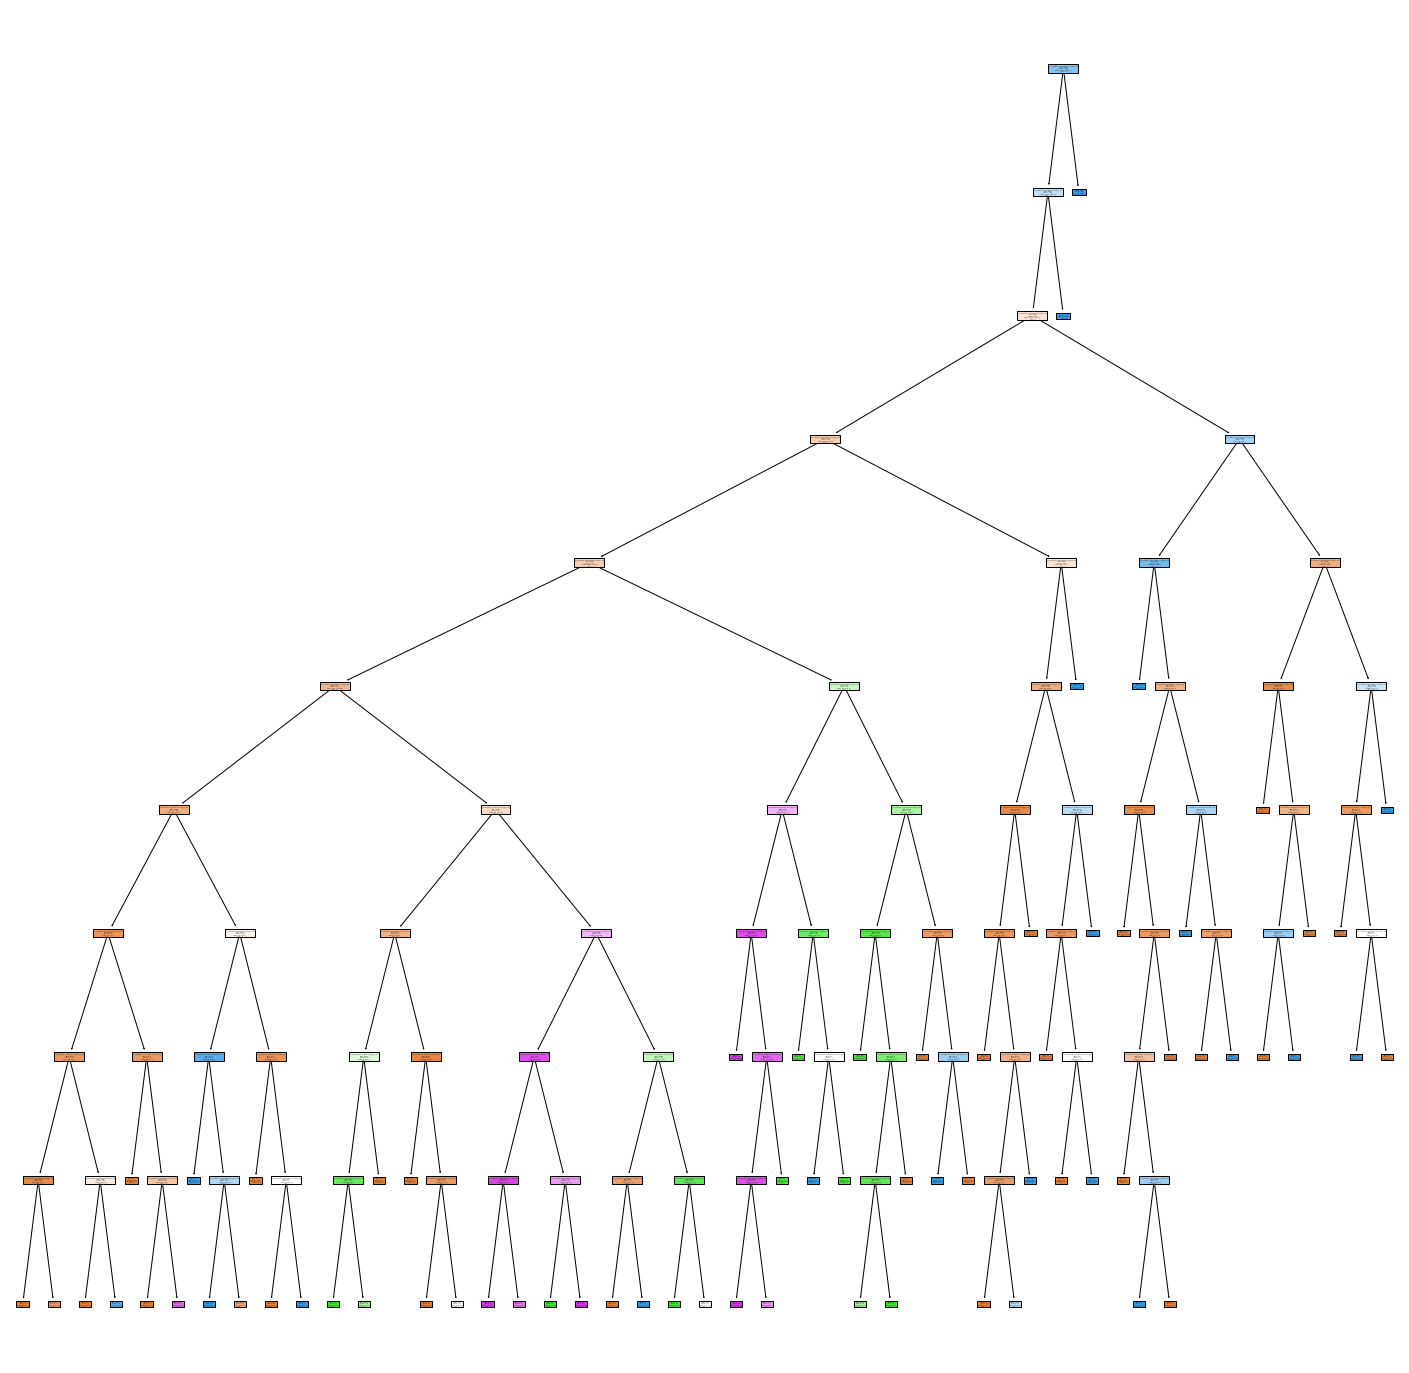

In [42]:
pfig = plt.figure(figsize=(25,25))
tree.plot_tree(model,feature_names=X_train,class_names='likelyhood', filled=True)
plt.show()

In [43]:
# Predict on Testing Data

# probabilities
y_pred_prob_0 = model.predict_proba(X_test)[:, 0]
y_pred_prob_1 = model.predict_proba(X_test)[:, 1]
y_pred_prob_2 = model.predict_proba(X_test)[:, 2]
y_pred_prob_3= model.predict_proba(X_test)[:, 3]

# Prediction
y_pred = model.predict(X_test)

# Results table
test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob_0':y_pred_prob_0 , 'y_pred_prob_1':y_pred_prob_1, 'y_pred_prob_2':y_pred_prob_2,'y_pred_prob_3':y_pred_prob_3})
dummy_column = pd.get_dummies(test_result['y_pred'], prefix='y_pred', drop_first=False, dummy_na=False)
test_result = pd.concat([test_result, dummy_column], join='outer', axis=1)
test_result.head()

,y_act,y_pred,y_pred_prob_0,y_pred_prob_1,y_pred_prob_2,y_pred_prob_3,y_pred_acc,y_pred_good,y_pred_unacc,y_pred_vgood
599,unacc,unacc,0.0,0.0,1.0,0.0,0,0,1,0
932,unacc,unacc,0.0,0.0,1.0,0.0,0,0,1,0
628,unacc,unacc,0.0,0.0,1.0,0.0,0,0,1,0
1497,acc,acc,1.0,0.0,0.0,0.0,1,0,0,0
1262,unacc,unacc,0.0,0.0,1.0,0.0,0,0,1,0


In [44]:
cfm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
cfm

y_pred,acc,good,unacc,vgood,All
y_act,,,,,
acc,108,2,5,3,118
good,0,11,0,6,17
unacc,4,0,357,0,361
vgood,0,6,0,17,23
All,112,19,362,26,519


In [45]:
# tc = Tree classifer
acuracy_tc = metrics.accuracy_score(test_result['y_act'], test_result['y_pred']) 
acuracy_tc

0.9499036608863198

In [46]:
f1_score_tc = metrics.f1_score(test_result['y_act'], test_result['y_pred'], average='weighted')  #weighted accounts for label imbalance.
f1_score_tc

0.9511978572892025

# Random Forest Classifier

In [47]:
# Create model object
model = RandomForestClassifier(random_state=0, max_depth=10, min_samples_split=2)

# Train Model
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=0)

In [48]:
# Predict on Testing Data

# probabilities
y_pred_prob_0 = model.predict_proba(X_test)[:, 0]
y_pred_prob_1 = model.predict_proba(X_test)[:, 1]
y_pred_prob_2 = model.predict_proba(X_test)[:, 2]
y_pred_prob_3= model.predict_proba(X_test)[:, 3]

# Prediction
y_pred = model.predict(X_test)

# Results table
test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob_0':y_pred_prob_0 , 'y_pred_prob_1':y_pred_prob_1, 'y_pred_prob_2':y_pred_prob_2,'y_pred_prob_3':y_pred_prob_3})
dummy_column = pd.get_dummies(test_result['y_pred'], prefix='y_pred', drop_first=False, dummy_na=False)
test_result = pd.concat([test_result, dummy_column], join='outer', axis=1)
test_result.head()

,y_act,y_pred,y_pred_prob_0,y_pred_prob_1,y_pred_prob_2,y_pred_prob_3,y_pred_acc,y_pred_good,y_pred_unacc,y_pred_vgood
599,unacc,unacc,0.000000,0.000000,1.000000,0.000000,0,0,1,0
932,unacc,unacc,0.020000,0.000000,0.980000,0.000000,0,0,1,0
628,unacc,unacc,0.034545,0.000000,0.964545,0.000909,0,0,1,0
1497,acc,acc,0.733642,0.108964,0.124203,0.033190,1,0,0,0
1262,unacc,unacc,0.000000,0.020000,0.960000,0.020000,0,0,1,0


In [49]:
cfm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
cfm

y_pred,acc,good,unacc,vgood,All
y_act,,,,,
acc,111,2,4,1,118
good,5,8,0,4,17
unacc,5,0,356,0,361
vgood,3,0,0,20,23
All,124,10,360,25,519


In [50]:
# rf = Random Forest classifer
acuracy_rf = metrics.accuracy_score(test_result['y_act'], test_result['y_pred']) 
acuracy_rf

0.953757225433526

In [51]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
f1_score_rf = metrics.f1_score(test_result['y_act'], test_result['y_pred'], average='weighted')  #weighted accounts for label imbalance.
f1_score_rf

0.9517965959413377

**Compare Results**

In [52]:
metrics_comp = [['LGR', acuracy, f1_score_lgr],
['TC', acuracy_tc, f1_score_tc],
['RF', acuracy_rf,f1_score_rf]]
pd.DataFrame(data=metrics_comp, columns=['Model', 'accuracy', 'f1_score'])


,Model,accuracy,f1_score
0,LGR,0.897881,0.894841
1,TC,0.949904,0.951198
2,RF,0.953757,0.951797


In [53]:
import joblib


In [54]:
joblib.dump(model,'random_fore')

['random_fore']